# Data Profiling
- Imports dataset as a `pandas` dataframe
- Prints data profile report for each feature of dataframe
- Outputs data profile report to `.json` and `.csv` 
- Visualizes dataset with `seaborn` `.pairplot()` and `.heatmap()` (optional) and exports `.png`

## Import Modules

In [1]:
import pandas
import numpy
import random
import datetime
import math
import seaborn
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
seaborn.set(rc = {"figure.figsize":(16,12)})
seaborn.set_style("whitegrid")

In [3]:
# get timestamp
now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d") + "_"

print("Timestamp set to: {}".format(timestamp))

Timestamp set to: 20180810_


## Settings
- Fill in the parameters within Settings subsections and run all cells to generate report

#### Data settings

#### Import data
- First import your data into a pandas dataframe (mandatory)

In [4]:
# data needs to be a pandas dataframe
# in this case using seaborns load_dataset() method to load in one from list above
data_path = "/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/diamonds.csv"
data = pandas.read_csv(data_path)

print("Dataframe has {} features and {} records".format(data.shape[1], data.shape[0]))

Dataframe has 10 features and 53940 records


In [5]:
print("Dataframe feature names:")
data.columns

Dataframe feature names:


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#### Export path
- Set your export path. Data profile reports and visualization images export to be sent to this location (mandatory)

In [6]:
exportpath = "/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/"

print("Export path set to '{}'".format(exportpath))

Export path set to '/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/'


#### Report Settings 
- Set report width and spacing chars (optional)

In [7]:
# Set report width, this will be used to calculate padding 
# between attributes and their corresponding values
report_width = 80
just_width = math.floor(report_width / 2)

# Set spacing char for header and attribute of reports
attribute_spacing_char = " "
header_spacing_char = "~"

print("Report width set to {}".format(report_width))
print("Attribute spacing char set to '{}'".format(attribute_spacing_char))
print("Header spacing char set to '{}'".format(header_spacing_char))

Report width set to 80
Attribute spacing char set to ' '
Header spacing char set to '~'


#### Visualization Settings
- Dataset will be visualized using `seaborn`'s `.pairplot()`
- If dataset has high dimensionality you may want to skip visualization step.
- More information about colour paletttes https://seaborn.pydata.org/tutorial/color_palettes.html

In [8]:
visualize_dataset = True

# How to deal with nulls ('remove' or 'mean' (fill with))
deal_with_nulls = "mean"

# Filters out cetgorical features to visualize
# Features with unique members in between this range will be plotted
nunique_range = [2,10]

# Features to exclude (list), you may want to exclude features from visualization, such as primary keys/foreign keys
features_to_exclude = []

# Examples 
# palette = "rainbow"
# palette = ["red", "blue", "green", "orange"])
# palette = ["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

palette = "Dark2"

# Sets the type of visualization for non identity pairings
# Types available 'kde' (kernel density), 'hist' (histogram)
identity_type = 'hist'

# Sets the type of visualization for non identity pairings
# Types available 'scatter', 'reg' (regression)
non_identity_type = 'scatter'

## Extract Data Profiles

### Get Statistical Summary

In [9]:
#call pandas describe method on dataframe
describe = data.describe(include = "all")

#transpose
describe_transposed = describe.T

#reset_index, moving the column names into a new series
describe_final = describe_transposed.reset_index()

In [10]:
describe_final

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
1,cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
5,table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
6,price,53940,NaN,NaN,NaN,3932.8,3989.44,326,950,2401,5324.25,18823
7,x,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
8,y,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9
9,z,53940,NaN,NaN,NaN,3.53873,0.705699,0,2.91,3.53,4.04,31.8


### Get Data Types

In [11]:
# get datatypes of each feature
dtypes = data.dtypes

In [12]:
#convert to dataframe and rename a column
dtypes_dataframe = pandas.DataFrame(dtypes, columns = ["data_type"])

In [13]:
# reset index, moving the column names into a new series
dtypes_final = dtypes_dataframe.reset_index()

In [14]:
# preview
dtypes_final.head()

,index,data_type
0,carat,float64
1,cut,object
2,color,object
3,clarity,object
4,depth,float64


### Get Null composition

In [15]:
#use notnull() and isnull() methods combined with sum() to
#get null composition of dataset
filled_count_series = data.notnull().sum().astype(int)
null_count_series = data.isnull().sum().astype(int)

#get amount of rows in dataset
totalcount = data.shape[0]

In [16]:
#create percentage series based on series above
percent_null =  null_count_series / totalcount
percent_filled = filled_count_series / totalcount

In [17]:
percent_null = percent_null.reset_index().rename(columns = {0:"null_percent"})
percent_filled = percent_filled.reset_index().rename(columns = {0:"non_null_percent"})
filled_count_series = filled_count_series.reset_index().rename(columns = {0:"non_null_counts"})
null_count_series = null_count_series.reset_index().rename(columns = {0:"null_counts"})

In [18]:
from functools import reduce

In [19]:
null_info_dataframe = reduce(lambda left,right: pandas.merge(left,right,on='index'), [percent_null,
                                                                                 percent_filled,
                                                                                 filled_count_series,
                                                                                 null_count_series])

In [20]:
null_info_dataframe.head()

,index,null_percent,non_null_percent,non_null_counts,null_counts
0,carat,0.0,1.0,53940,0
1,cut,0.0,1.0,53940,0
2,color,0.0,1.0,53940,0
3,clarity,0.0,1.0,53940,0
4,depth,0.0,1.0,53940,0



### Merge all

In [21]:
merged = reduce(
    lambda left, right: pandas.merge(left, right, on='index', how="left"),
    [null_info_dataframe, dtypes_final, describe_final])

### Cleanup: Drop count column

In [22]:
merged["row_count"] = totalcount

merged.drop(["count"], axis = 1, inplace = True)

In [23]:
merged.head()

,index,null_percent,non_null_percent,non_null_counts,null_counts,data_type,unique,top,freq,mean,std,min,25%,50%,75%,max,row_count
0,carat,0.0,1.0,53940,0,float64,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01,53940
1,cut,0.0,1.0,53940,0,object,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53940
2,color,0.0,1.0,53940,0,object,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53940
3,clarity,0.0,1.0,53940,0,object,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53940
4,depth,0.0,1.0,53940,0,float64,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79,53940


### Cleanup: Calculate unique values for numerical features

In [24]:
# Fill in gaps in unique column with nunique method

for index in range(merged.shape[0]):
    
    unique_value = merged.loc[index, "unique"]
    
    if numpy.isnan(unique_value):
        
        feature_name = merged.loc[index, "index"]
        
        
        number_of_uniques = data[feature_name].nunique()
        merged.loc[index, "unique"] = number_of_uniques
        print("Feature {} unique values being calculated and adjusted to {}".format(feature_name, number_of_uniques))

Feature carat unique values being calculated and adjusted to 273
Feature depth unique values being calculated and adjusted to 184
Feature table unique values being calculated and adjusted to 127
Feature price unique values being calculated and adjusted to 11602
Feature x unique values being calculated and adjusted to 554
Feature y unique values being calculated and adjusted to 552
Feature z unique values being calculated and adjusted to 375


### Cleanup: Change types

In [25]:
# Changing type of datatype column to string
merged["data_type"] = merged["data_type"].astype(str)

### Cleanup: Round values

In [26]:
unique_datatypes = list(merged["data_type"].unique())

print("Unique datatypes in this dataset are: {}".format(unique_datatypes))

if "float64" in unique_datatypes or "int64" in unique_datatypes:
    
    round_values = True
    rounded_places = 4
    
    for column in ["mean", "std", "min", "25%", "50%", "75%", "max"]:
        
        merged[column] = merged[column].astype(float).round(rounded_places)
else:
    round_values = False

Unique datatypes in this dataset are: ['float64', 'object', 'int64']


### Create Data Profile Dictionary

In [27]:
profile_dict = {}

In [28]:
# Store list of features relevant to dictionary
merged_attributes = list(merged.columns)
merged_attributes.remove("index")

# Iterate through merged records
for index in range(merged.shape[0]):
    
    # Store column name
    column = merged.loc[index, "index"]
    
    # Create empty list, to store sub dictionaries in
    profile_dict[column] = []
    
    # For each attribute in merged_attributes list do this
    for attr in merged_attributes:
        
        # Locate the value of the attribuet for a given record
        value = merged.loc[index, attr]
        
        # Append dictionary to list within main dictionary
        profile_dict[column].append({attr: value})

## Export results as .json and .csv

### Helper Function to convert invalid json values

In [29]:
# will try to convert a value to a float, followed by string,
# if the float conversion fails

def convert_invalid_values(value):
    
    try:
        new_value = float(value)
    except:
        new_value = str(value)

    return new_value

### Export as json

In [30]:
import json

In [31]:
with open(exportpath + "profile.json", "w") as fileobj:
    # for errors I want to attempt to convert the value to a float before str using
    # the function defined above
    json.dump(profile_dict, fileobj, default = convert_invalid_values)
    
fileobj.close()

### Export as csv

In [32]:
merged.to_csv(exportpath + "profile.csv", index = False)

## Data Profile Results 

In [33]:
total_keys = len(profile_dict.keys())
column_number = 0

In [34]:
for key in profile_dict.keys():
    
    # Increment column number
    column_number = column_number + 1
    
    # Calculate column pos
    column_pos = " ({}/{})"
    
    print("\n", (" " + key + " ").center(report_width, header_spacing_char))
    
    sub_dictionary = profile_dict[key]
    for dictionary in sub_dictionary:
        
        keys = list(dictionary.keys())
        attribute = keys[0]
        value = dictionary[attribute]
        
        if "percent" in attribute:
            formatted_value = "{0:.2%}".format(value)
        else:
            formatted_value = str(value)
        
        print(attribute.ljust(just_width, attribute_spacing_char), 
              formatted_value.rjust(just_width, attribute_spacing_char))


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ carat ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
null_percent                                                                0.00%
non_null_percent                                                          100.00%
non_null_counts                                                             53940
null_counts                                                                     0
data_type                                                                 float64
unique                                                                        273
top                                                                           nan
freq                                                                          nan
mean                                                                       0.7979
std                                                                         0.474
min                                                                           0.2
25%            

## Visualizations
(Optional)

### Pairplot

#### Create subset of data without nulls for visualizing
- Will react to `deal_with_nulls` variable

In [35]:
d = "this"

if d in ["this is", "that"]:
    print("true")

In [36]:
list(merged[(merged["data_type"] == "int64") | 
            (merged["data_type"] == "float64")]["index"])

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [37]:
if visualize_dataset == True:
    
    if deal_with_nulls == "remove":
        
        # Print message
        print("Nulls will be removed from visualization dataset.")
        
        # Remove each record containing any nulls
        data_no_nulls = data.dropna(how = "any", axis = 0)

        print("Shape of original dataset {}"\
              .format(data.shape))
        print("Shape of visualization dataset {}. \n{} Records were removed (containing nulls)."\
              .format(data_no_nulls.shape, data.shape[0] - data_no_nulls.shape[0]))
    else:
        # Print message
        
        print("Nulls will be replaced by the mean of each numeric feature.")
        
        # Find each column of numeric quality and store in list
        columns_to_fill_mean = list(
                merged[(merged["data_type"] == "int64") | 
                (merged["data_type"] == "float64")]["index"])
        
        data_no_nulls = data
        
        # For each column in list fill the dataset with the mean of that column
        for column in columns_to_fill_mean:
            data_no_nulls[column] = data_no_nulls[column].fillna(data_no_nulls[column].mean())

Nulls will be replaced by the mean of each numeric feature.


#### Drop columns from visualization dataset
- These features are listed in `features_to_exclude` variable

In [38]:
data_no_nulls_column_list = list(data_no_nulls.columns)

if visualize_dataset == True:
    for feature in features_to_exclude:
        if feature in data_no_nulls_column_list:
            data_no_nulls.drop([feature], axis = 1, inplace = True)
            print("{} removed from visualization dataset".format(feature))

#### Calculate chosen_categorical_features (features with unique number of items between given range)

In [39]:
if visualize_dataset == True:

    # Create subset of merged containing data type = object and nunique between range above
    chosen_categorical_features = list(merged[(merged["unique"] >= nunique_range[0]) & 
                               (merged["unique"] <= nunique_range[1]) & 
                               (merged["data_type"] == "object")]["index"])

    print(chosen_categorical_features)

    # Remove unwanted features
    for feature in features_to_exclude:
        if feature in chosen_categorical_features:
            chosen_categorical_features.remove(feature)

    # Preview chosen_categorical_features
    print(chosen_categorical_features)

['cut', 'color', 'clarity']
['cut', 'color', 'clarity']


#### Calculate which columns can be used as categories to split float data in pairplots
- Note: code hasn't accounted for datasets without float/int features yet.

#### Convert bool dtypes before visualizing, as this produces errors otherwise 

In [40]:
for column in data_no_nulls.columns:
    dtype = data_no_nulls[column].dtype
    if dtype == "bool":
        data_no_nulls[column] = data_no_nulls[column].astype(str)

<Figure size 1152x864 with 0 Axes>

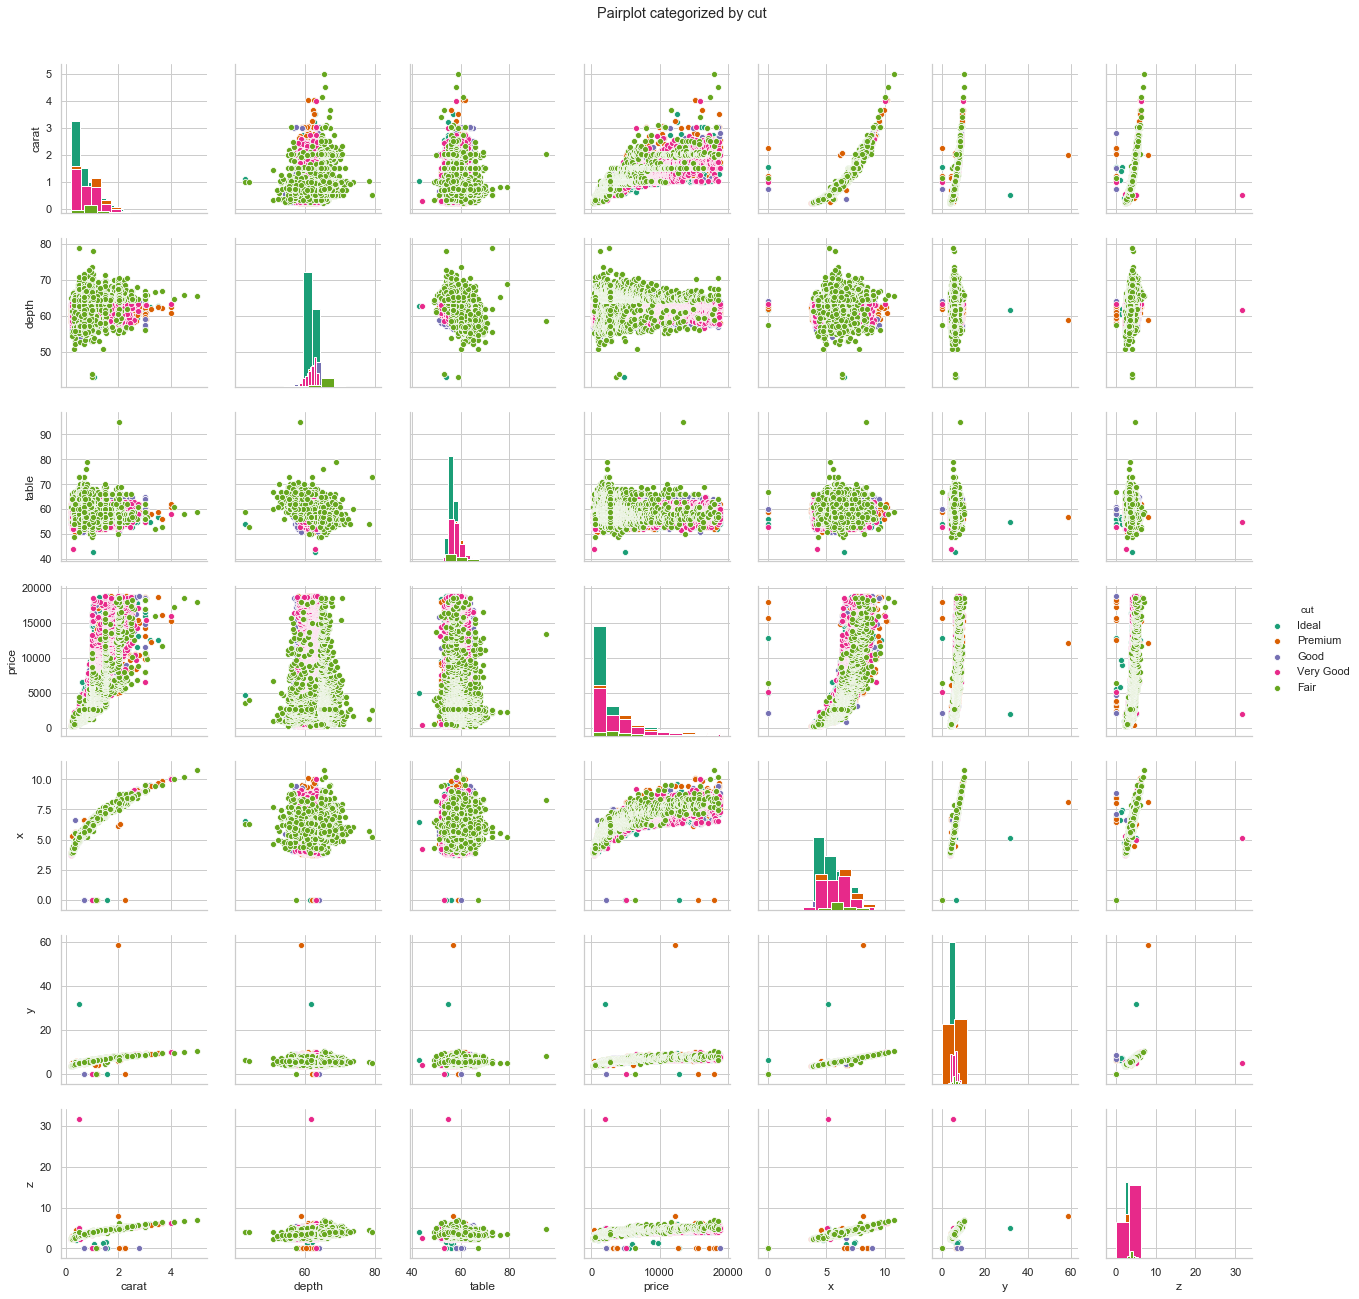

<Figure size 1152x864 with 0 Axes>

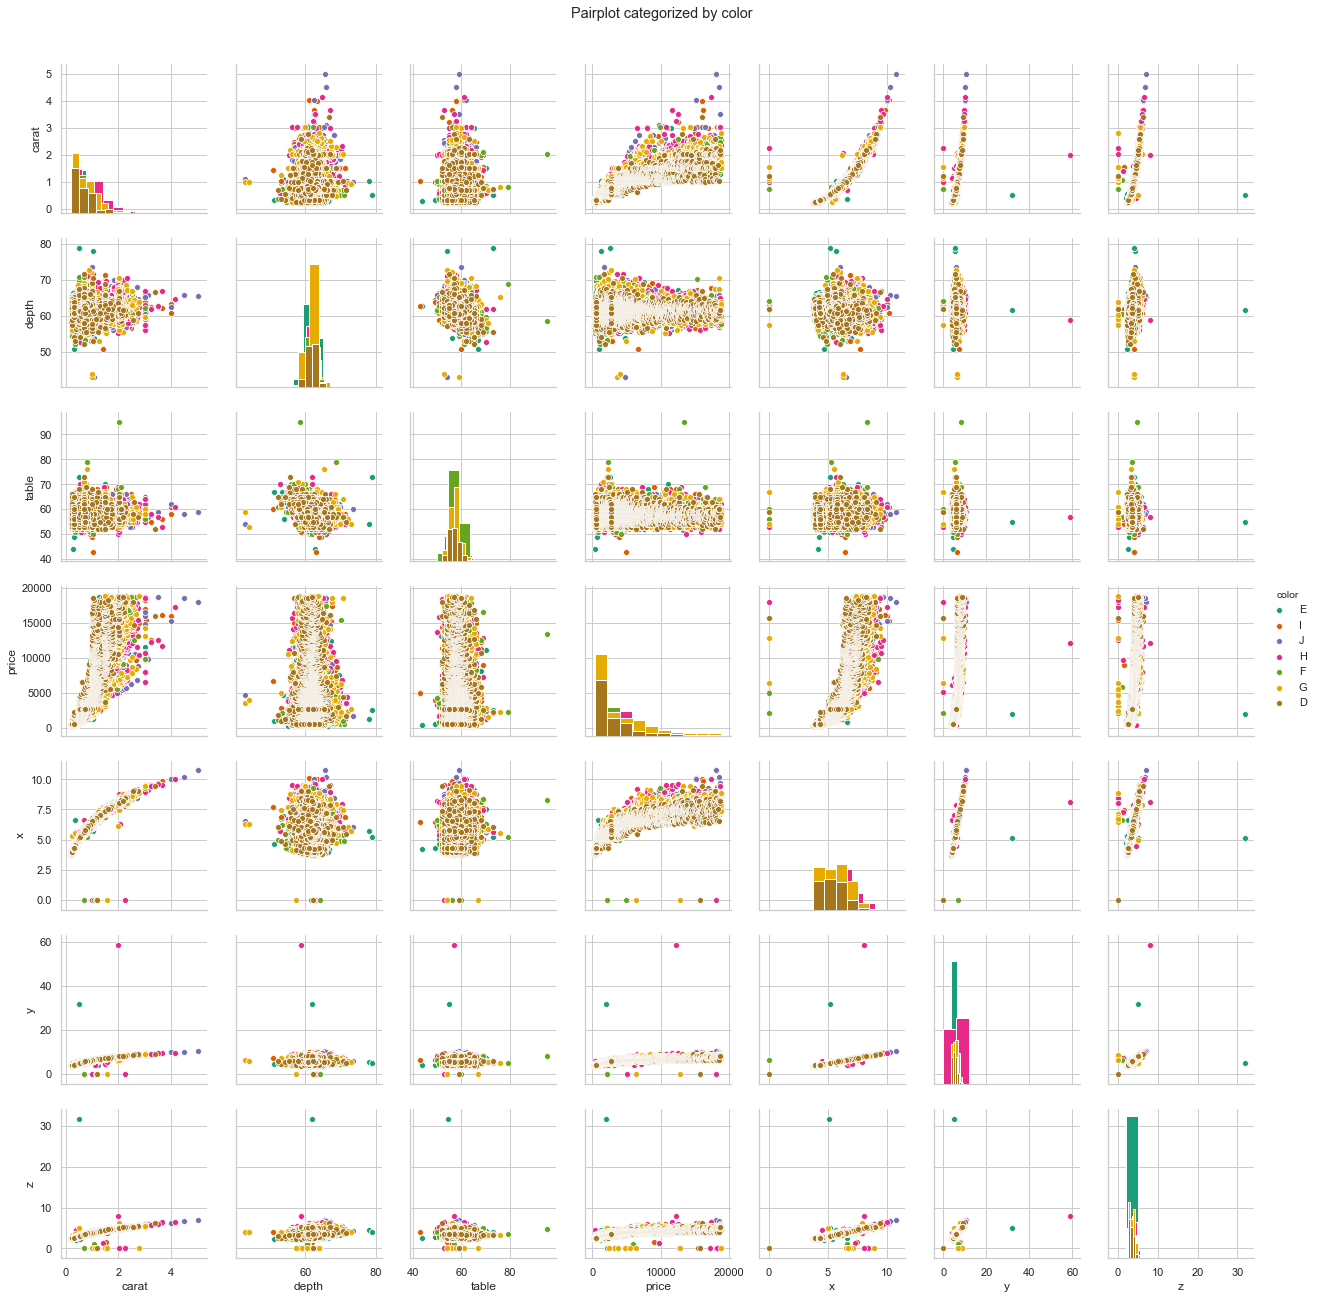

<Figure size 1152x864 with 0 Axes>

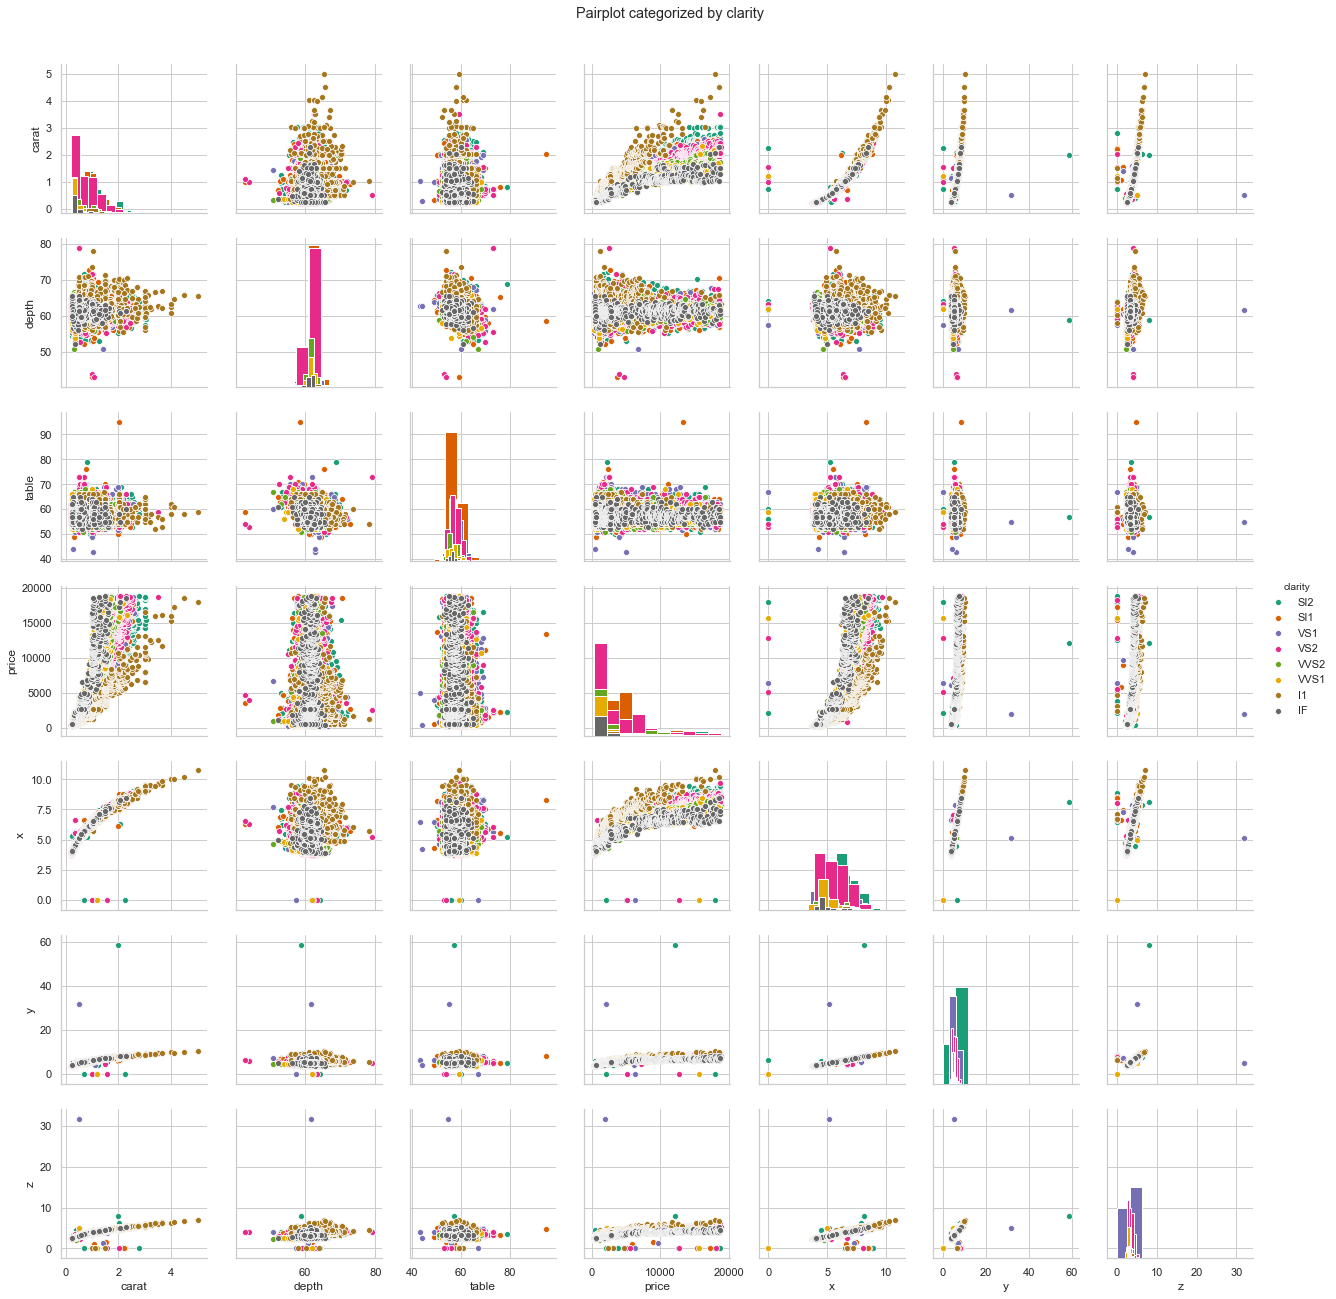

In [41]:
if visualize_dataset == True:
    
    # If dataset contains at least one categorical feature do this
    if "unique" in merged.columns:

        for column in chosen_categorical_features:

            plt.figure()
            myplot = seaborn.pairplot(data = data_no_nulls, 
                                      kind = non_identity_type,
                                      diag_kind = identity_type,
                                      hue = column,
                                      palette = palette
                                     )

            myplot.fig.suptitle("Pairplot categorized by {}".format(column), 
                         y = 1.03)

            plt.savefig(exportpath + timestamp +  column + "_pairplot.png")

    # If data set has no categorical features (only floats/ints) do this
    else:

        plt.figure()

        myplot = seaborn.pairplot(data = data_no_nulls, 
                                  kind = non_identity_type,
                                  diag_kind = identity_type
                                 )

        myplot.fig.suptitle("Pairplot", 
                     y = 1.03)

        plt.savefig(exportpath + timestamp +  "data_profile_pairplot.png")

### Correlation Heatmap

In [42]:
seaborn.set(rc = {"figure.figsize":(16,14)})

In [44]:
if visualize_dataset == True and round_values == True:
    # Save path
    heatmap_save_path = exportpath + timestamp + "heatmap.png"
    
    # Create correlation Matrix
    correlation_dataframe = data_no_nulls.corr()
    
    # Create mask
    mask = numpy.zeros_like(corr)
    mask[numpy.triu_indices_from(mask)] = True

    # Create heatmap, show and export as .png
    seaborn.heatmap(data = correlation_dataframe,
               cmap = ['#b2182b',
                    '#ef8a62',
                    '#fddbc7',
                    '#f7f7f7',
                    '#d1e5f0',
                    '#67a9cf',
                    '#2166ac'],
               center = 0,
               square = True,
               linewidth = 1,
               mask = mask
               annot = True).get_figure().savefig(heatmap_save_path)
    
    print("Heatmap saved to '{}'".format(heatmap_save_path))
else:
    print("No heatmap was produced. Dataset contains no numeric features or visualize_dataset variable was set to False.")

SyntaxError: invalid syntax (<ipython-input-44-da61b5a75bc9>, line 25)